# Module Eight Discussion: One-way ANOVA

This notebook contains the step-by-step directions for your Module Eight discussion. It is very important to run through the steps in order. Some steps depend on the outputs of earlier steps. Once you have completed the steps in this notebook, be sure to answer the questions about this activity in the discussion for this module.

Reminder: If you have not already reviewed the discussion prompt, please do so before beginning this activity. That will give you an idea of the questions you will need to answer with the outputs of this script.

## Initial post (due Thursday)
_____________________________________________________________________________________________________________________________________________________

## Step 1: Uploading the dataset
The data for this discussion is included in a CSV file called etf_returns.csv. It contains ten-year returns of 30 ETFs for three sectors: financial, energy, and technology. The read_csv method in pandas can be used to upload the CSV. 

Click the block of code below and hit the **Run** button above.

In [1]:
try:
    import traceback

    import pandas as pd
    import scipy.stats as st
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    
    from IPython.display import HTML
    
    print(f'''Imports Successful:
                Pandas: {pd}
                Scipy: {st}
                MatPlotLib: {plt}
                Seaborn: {sns}
                Numpy: {np}
                IPython: {HTML}
            ''')

except Exception as e:
    print(f'''Error Messages:
                Error: {str(e)}
                Error type: {type(e).__name__}
            ''')
    traceback.print_exc()

Imports Successful:
                Pandas: <module 'pandas' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py'>
                Scipy: <module 'scipy.stats' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\scipy\\stats\\__init__.py'>
                MatPlotLib: <module 'matplotlib.pyplot' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>
                Seaborn: <module 'seaborn' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>
                Numpy: <module 'numpy' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\numpy\\__init__.py'>
                IPython: <class 'IPython.core.display.HTML'>
            


In [2]:
# method to load data
def load_data(filepath):
    try:
        df = pd.read_csv(filepath)

        # return df for use when method is called        
        return df

    except Exception as e:
        print(f'Error loading {filepath}. Check entry for typos')
        print(f'''Error Messages:
                    Error: {str(e)}
                    Error Type: {type(e).__name__}
                ''')
        traceback.print_exc()

load_data('etf_returns.csv')


# read data from etf_returns.csv.
#etf_returns_df = pd.read_csv('etf_returns.csv')

# print etf returns data set.
#print(etf_returns_df.head(10))

,financial,energy,technology
0,5.5,5.2,7.3
1,7.1,7.4,8.2
2,6.9,6.6,7.1
3,5.1,5.7,7.6
4,4.6,5.6,8.2
5,5.3,5.5,11.5
6,5.9,6.4,9.2
7,5.6,6.1,9.5
8,5.5,5.2,7.3
9,7.1,7.4,8.2


## Step 2: Performing one-way ANOVA
The scipy.stats submodule can be used to perform one-way analysis of variance (ANOVA). The method f_oneway is used to perform this test. The inputs are individual dataframes of all groups (in this discussion, groups are sectors). 

Click the block of code below and hit the **Run** button above.

In [3]:

# method to interpret results for p-value
def interpret_results(p_val, alpha = 0.05):
    if p_val < alpha:
            return(f'  Reject the null hypothesis: p-value {p_val:.4f} < significance level {alpha}\n'
                   f'  There is enough evidence to support the alternative hypothesis')
    else:
            return(f'  Fail to reject the null hypothesis: p-value {p_val:.4f} > significance level {alpha}\n'
                   f'  There is not enough evidence to support the alternative hypothesis')

# df = etf_returns_df
# col_1 = 'financial'
# col_2 = 'energy' 
# col_3 = 'technology'
def f_test(df = None, cols = None, alpha = 0.05):
    if df is None:
        df = load_data('etf_returns.csv')
    if not cols or len(cols) < 2:
        raise ValueError('Please provide at least two column names.')

    groups = [df[c] for c in cols]

    # calculate f_oneway() and interpret results
    test_stat, p_val = st.f_oneway(*groups)
    interpretation = interpret_results(p_val, alpha = alpha)

    print(f'Metrics:\n'
              f' Test-Statistic: {test_stat:.2f}\n'
              f' P-Value: {p_val:.4f}\n\n'
              f'Interpretation of Results:\n{interpretation}')
        
f_test(cols = ['financial', 'energy', 'technology'])


Metrics:
 Test-Statistic: 55.07
 P-Value: 0.0000

Interpretation of Results:
  Reject the null hypothesis: p-value 0.0000 < significance level 0.05
  There is enough evidence to support the alternative hypothesis


## Step 3: Visualizing differences
There are post-hoc tests available that can be used to identify groups that are significantly different than others. Alternatively, a quick approach to identifying differences is to create a visual plot for data distributions using side-by-side boxplots. The block of code below uses the seaborn module and matplotlib.pyplot submodule to create side-by-side boxplots for the ten-year returns of ETFs in financial, energy, and technology sectors. 

Click the block of code below and hit the **Run** button above.  
NOTE: If the graph is not created, click the code section and hit the **Run** button again.

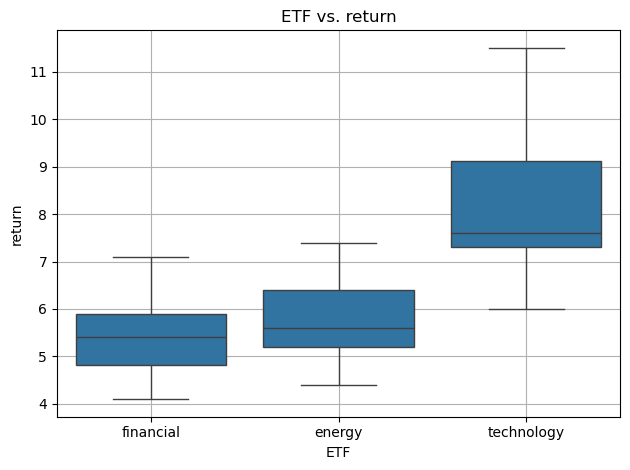

,ETF,return
0,financial,5.5
1,financial,7.1
2,financial,6.9
3,financial,5.1
4,financial,4.6
...,...,...
85,technology,7.4
86,technology,6.0
87,technology,7.4
88,technology,7.4


In [4]:
# method to rename columns; ex usage: plotting data
def reshape_df(df = None, cols = None):
    if df is None:
        df = load_data('etf_returns.csv')
    if not cols or len(cols) < 2:
        raise ValueError('Please enter at least two column names')
    
    # loop logic behind using the .melt() method

    # instantiate empty list
    # new_df = []

    # loop through cols, add to temp_df to perform operations, append to empty list
    # pivoting: reshape into long format
    # for col in cols:
        # temp_df = df[[col]].rename(columns = {col: 'return'}) # renames col to 'return'
        # temp_df['ETF'] = col # create 'ETF' column in df
        # new_df.append(temp_df) # append df: new columns = {return: col values, ETF: column name}
    
    # all_etf_df = pd.concat(new_df)

    # melt method: vectorized operation to reshape df
    all_etf_df = df[cols].melt(value_vars = cols, var_name = 'ETF', value_name = 'return') # pd.concat(new_df)

    # plot data
    sns.boxplot(x = 'ETF', y = 'return', data = all_etf_df)
    plt.title('ETF vs. return', fontsize = 12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return all_etf_df

reshape_df(cols = ['financial', 'energy', 'technology'])

    

## End of initial post
Attach the HTML output to your initial post in the Module Eight discussion. The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all questions about this activity in the Module Eight discussion.

## Follow-up posts (due Sunday)
Return to the Module Eight discussion to answer the follow-up questions in your response posts to other students. There are no Python scripts to run for your follow-up posts.